# Image Classification using CNNs

This example demonstrates training a simple CNN model to classify the MNIST dataset of handwritten digits, using no DL frameworks but what have developed in this repo. 


A keras example can be found here:
https://keras.io/examples/mnist_cnn/

## Download and prepare the MNIST dataset

In [1]:
from data.datasets import MNIST
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Number of training images:  48000
Number of validation images:  12000
Number of testing images:  10000
Some examples of training images:


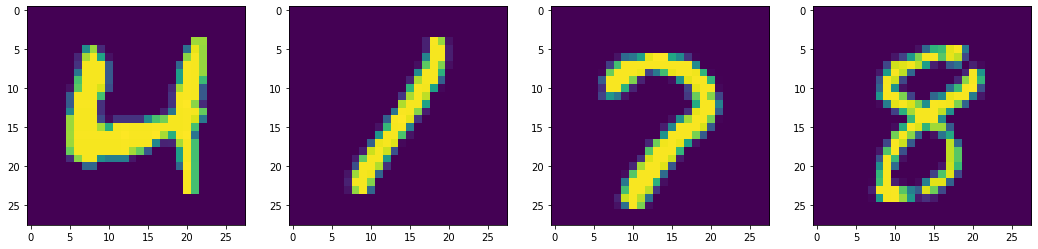

In [2]:
np.random.seed(0)

mnist = MNIST()
mnist.load()
idx = np.random.randint(mnist.num_train, size=4)
img = mnist.x_train[idx][:,0,:,:]

print('Some examples of training images:')

plt.figure(1, figsize=(18, 18))
plt.subplot(1, 4, 1)
plt.imshow(img[0])
plt.subplot(1, 4, 2)
plt.imshow(img[1])
plt.subplot(1, 4, 3)
plt.imshow(img[2])
plt.subplot(1, 4, 4)
plt.imshow(img[3])
plt.show()

## Define our CNN model

In [3]:
from nn.layers import *
from nn.model import Model

def my_cnn_model():
    conv1_params = {
        'kernel_h': 3,
        'kernel_w': 3,
        'pad': 0,
        'stride': 1,
        'in_channel': 1,
        'out_channel': 16  # 16 kernels
    }
    conv2_params = {
        'kernel_h': 3,
        'kernel_w': 3,
        'pad': 0,
        'stride': 1,
        'in_channel': 16,
        'out_channel': 16  # 16 kernels
    }
    pool1_params = {
        'pool_type': 'max',
        'pool_height': 2,
        'pool_width': 2,
        'stride': 2,
        'pad': 0
    }
    pool2_params = {
        'pool_type': 'max',
        'pool_height': 3,
        'pool_width': 3,
        'stride': 2,
        'pad': 0
    }
    
    model = Model()
    
    model.add(Conv2D(conv1_params, name='conv1', initializer=Gaussian(std=0.001)))
    model.add(ReLU(name='relu1'))
    model.add(Pool2D(pool1_params, name='pooling1'))
    model.add(Conv2D(conv2_params, name='conv2', initializer=Gaussian(std=0.001)))
    model.add(ReLU(name='relu2'))
    model.add(Pool2D(pool2_params, name='pooling2'))
    model.add(Dropout(rate=0.25, name='dropout1'))
    
    model.add(Flatten(name='flatten1'))
    model.add(Linear(400, 256, name='fclayer1', initializer=Gaussian(std=0.01)))
    model.add(ReLU(name='relu3'))
    model.add(Dropout(rate=0.5, name='dropout2'))
    model.add(Linear(256, 10, name='fclayer2', initializer=Gaussian(std=0.01)))
    
    return model

## Compile and train the model

In [6]:
from nn.optimizers import RMSprop, Adam
from nn.loss import SoftmaxCrossEntropy, L2
import time

model = my_cnn_model()
adam = Adam(lr=0.001, decay=0, sheduler_func=lambda lr, it: lr*0.5 if it%4000==0 else lr, bias_correction=True)
model.compile(optimizer=adam, loss=SoftmaxCrossEntropy(num_class=10), regularization= L2(w=0.001))

start = time.time()

train_results, val_results, test_results = model.train(mnist, 
    train_batch=50, val_batch=1000, test_batch=1000, epochs=5,
    val_intervals=-1, test_intervals=900, print_intervals=100)

print('time taken:', time.time() - start)

Epoch 0: 
Train iter 100/960:	acc 0.12, loss 2.31, reg loss 0.00, speed 723.81 samples/sec
Train iter 200/960:	acc 0.02, loss 2.27, reg loss 0.00, speed 755.13 samples/sec
Train iter 300/960:	acc 0.64, loss 1.29, reg loss 0.01, speed 778.52 samples/sec
Train iter 400/960:	acc 0.62, loss 1.05, reg loss 0.02, speed 764.75 samples/sec
Train iter 500/960:	acc 0.54, loss 1.22, reg loss 0.02, speed 804.17 samples/sec
Train iter 600/960:	acc 0.70, loss 0.80, reg loss 0.02, speed 758.67 samples/sec
Train iter 700/960:	acc 0.66, loss 1.05, reg loss 0.02, speed 755.47 samples/sec
Train iter 800/960:	acc 0.58, loss 1.09, reg loss 0.02, speed 756.59 samples/sec
Test acc 0.76, loss 0.74
Train iter 900/960:	acc 0.78, loss 0.72, reg loss 0.03, speed 352.59 samples/sec
Epoch 1: 
Train iter 100/960:	acc 0.72, loss 0.69, reg loss 0.03, speed 711.29 samples/sec
Train iter 200/960:	acc 0.60, loss 1.05, reg loss 0.03, speed 739.70 samples/sec
Train iter 300/960:	acc 0.72, loss 0.94, reg loss 0.03, speed 74

## Plot the results

highest test accuracy: 0.9379


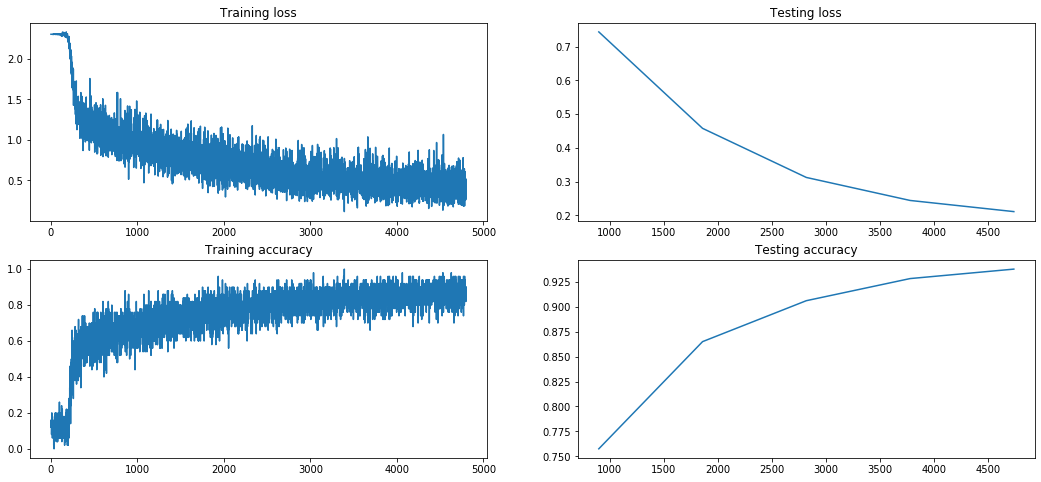

In [9]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 2, 1)
plt.title('Training loss')
plt.plot(train_results[:,0], train_results[:, 1])
plt.subplot(2, 2, 3)
plt.title('Training accuracy')
plt.plot(train_results[:,0], train_results[:, 2])
plt.subplot(2, 2, 2)
plt.title('Testing loss')
plt.plot(test_results[:,0], test_results[:, 1])
plt.subplot(2, 2, 4)
plt.title('Testing accuracy')
plt.plot(test_results[:, 0], test_results[:,2])

print("highest test accuracy: {}".format(max(test_results[:,2])))